# <b>Machine Learning for Evapotranspiration Prediction: A Hydrological Perspective on Blue Cypress Marsh, Florida, US   <span style='color:#0B2F9F'></code></span></b>
Mencoba untuk menemukan korelasi antar parameter-parameter data yang didapatkan dari USGS [(SOFIA | South Floria Information Access)](https://sofia.usgs.gov/exchange/evapotrans/index.php) terhadap nilai evapotranspirasi di sebuah "marsh", Florida, US.<br>

Berikut adalah penjelasan singkat masing-masing variabel serta kategorinya sebagai variabel dependen atau independen:  

1. **Latent Heat (LH, W/m²)**  
   - Panas yang digunakan untuk penguapan tanpa perubahan suhu.  
   - **Independen** (dapat mempengaruhi variabel lain seperti evapotranspirasi).  
   - Features

2. **Solar Radiation (SR, W/m²)**  
   - Energi matahari yang diterima permukaan bumi.  
   - **Independen** (menjadi faktor utama dalam pemanasan dan proses evaporasi).  
   - Features

3. **Net Radiation (NR, W/m²)**  
   - Selisih antara radiasi masuk dan keluar di permukaan.  
   - **Independen** (menentukan keseimbangan energi).  
   - Features

4. **Sensible Heat Flux (SHF, W/m²)**  
   - Panas yang ditransfer melalui konduksi dan konveksi tanpa perubahan fase.  
   - **Independen** (berhubungan dengan suhu udara dan permukaan).  
   - Features

5. **Relative Humidity (RH, %)**  
   - Kelembaban udara relatif dibandingkan kapasitas maksimumnya.  
   - **Independen** (dapat mempengaruhi penguapan dan suhu udara).
   - Features  

6. **Maximum Relative Humidity (MaRH, %)**  
   - Kelembaban tertinggi dalam suatu periode tertentu.  
   - **Independen** (menggambarkan kondisi atmosfer).
   - Gabung menjadi Relative Humidity (RH)  
   

7. **Minimum Relative Humidity (MiRH, %)**  
   - Kelembaban terendah dalam suatu periode tertentu.  
   - **Independen** (mirip dengan MaRH, namun untuk nilai minimum).
   - Gabung menjadi Relative Humidity (RH)

8. **Air Temperature (AT, °C)**  
   - Suhu udara pada waktu tertentu.  
   - **Independen** (mempengaruhi kelembaban dan penguapan).  
   - Features

9. **Maximum Air Temperature (MaAT, °C)**  
   - Suhu udara tertinggi dalam periode tertentu.  
   - **Independen** (mempengaruhi proses penguapan).
   - Gabung menjadi Air Temperature (AT)

10. **Minimum Air Temperature (MiAT, °C)**  
   - Suhu udara terendah dalam periode tertentu.  
   - **Independen** (berhubungan dengan keseimbangan energi).  
   - Gabung menjadi Air Temperature (AT)

11. **Water Distance Above (+) or Below (-) Land Surface (WD, m)**  
   - Ketinggian atau kedalaman air tanah relatif terhadap permukaan tanah.  
   - **Dependen** (dipengaruhi oleh curah hujan, evaporasi, dan penggunaan air).  
   - Features

12. **Bowen Ratio (BR)**  
   - Rasio antara panas nyata dan panas laten, menunjukkan keseimbangan energi.  
   - **Independen** (menggambarkan karakteristik pertukaran energi di permukaan).
   - Features

13. **Evapotranspiration (ET, mm/d)**  
   - Gabungan evaporasi dan transpirasi tanaman.  
   - **Dependen** (dipengaruhi oleh suhu, kelembaban, dan radiasi matahari).
   - Target

Secara umum, akan diperlihatkan juga korelasi antar masing-masing variable serta target
<br>



---



---


#### <i><b><span style='color:#55679C'>Stage 1. Import Data  </span>

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/00 Belajar Machine Learning/02 ET Linear Regression/et_data_Blue_Cypress_Marsh.csv')
df

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,maximum_relative_humidity,minimum_relative_humidity,air_temperature,maximum_air_temperature,minimum_air_temperature,water_distance,evapotranspiration,bowen_ratio
0,11-12-2009,61.53,88.8,64.0,0.00,77.2,\N,\N,20.4,\N,\N,0.10,2.17,-0.02
1,12-12-2009,38.42,68.2,41.9,0.00,85.8,\N,\N,21.7,\N,\N,0.10,1.36,-0.17
2,13-12-2009,67.70,153.4,93.3,27.39,84.4,\N,\N,24.2,\N,\N,0.10,2.39,0.40
3,14-12-2009,61.01,156.9,87.4,28.78,87.9,\N,\N,22.5,\N,\N,0.10,2.15,0.47
4,15-12-2009,50.24,113.6,63.0,13.19,91.4,\N,\N,21.6,\N,\N,0.10,1.77,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,09-06-2018,181.60,NaN,223.6,41.90,NaN,100.00,53.00,NaN,31.80,21.30,0.30,6.40,0.20
3096,10-06-2018,127.10,NaN,178.8,51.70,NaN,100.00,55.00,NaN,32.30,22.70,0.29,4.50,0.40
3097,11-06-2018,145.00,NaN,177.7,32.70,NaN,100.00,62.00,NaN,31.50,21.80,0.29,5.10,0.20
3098,12-06-2018,184.70,NaN,223.1,38.40,NaN,100.00,54.00,NaN,32.20,21.50,0.28,6.50,0.20



---



---


#### <i><b><span style='color:#55679C'>Stage 2. EDA and Cleaning Data </span>

In [268]:
df.describe() # statistical data before cleaning

,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration,bowen_ratio
count,2925.000000,1768.000000,2915.000000,2888.000000,1768.000000,1768.000000,2968.000000,3100.000000,2924.000000
mean,101.970226,204.268439,133.948439,34.405551,82.061312,21.826301,0.207126,3.566045,0.357175
std,42.911843,68.371993,53.543224,20.676084,6.566143,4.967766,0.214424,1.520805,0.306705
min,0.000000,10.500000,-7.300000,0.000000,51.000000,2.400000,-0.700000,0.000000,-2.300000
25%,66.800000,159.000000,91.300000,19.690000,78.900000,19.300000,0.100000,2.300000,0.200000
50%,100.500000,205.500000,134.000000,33.000000,82.500000,22.800000,0.200000,3.500000,0.310000
75%,135.900000,258.725000,178.950000,47.132500,86.200000,25.700000,0.390000,4.790000,0.500000
max,217.600000,340.900000,261.600000,110.600000,97.300000,29.600000,0.700000,7.670000,2.500000


In [269]:
df.isnull().sum()

,0
date,0
latent_heat,175
solar_radiation,1332
net_radiation,185
sensible_heat_flux,212
relative_humidity,1332
maximum_relative_humidity,0
minimum_relative_humidity,0
air_temperature,1332
maximum_air_temperature,0


In [270]:
df['minimum_relative_humidity'] = pd.to_numeric(df['minimum_relative_humidity'], errors='coerce') # deteksi nilai '/N' pada kolom dan merubahnya menjadi NaN
df['maximum_relative_humidity'] = pd.to_numeric(df['maximum_relative_humidity'], errors='coerce') # deteksi nilai '/N' pada kolom dan merubahnya menjadi NaN
df['relative_humidity'] = df['relative_humidity'].fillna((df['minimum_relative_humidity'] + df['maximum_relative_humidity']) / 2) # mengisi data relative humidity yang kosong menjadi rata-rata min dan max-nya

df['minimum_air_temperature'] = pd.to_numeric(df['minimum_air_temperature'], errors='coerce') # deteksi nilai '/N' pada kolom dan merubahnya menjadi NaN
df['maximum_air_temperature'] = pd.to_numeric(df['maximum_air_temperature'], errors='coerce') # deteksi nilai '/N' pada kolom dan merubahnya menjadi NaN
df['air_temperature'] = df['air_temperature'].fillna((df['minimum_air_temperature'] + df['maximum_air_temperature']) / 2) # mengisi data air temperature yang kosong menjadi rata-rata min dan max-nya
df

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,maximum_relative_humidity,minimum_relative_humidity,air_temperature,maximum_air_temperature,minimum_air_temperature,water_distance,evapotranspiration,bowen_ratio
0,11-12-2009,61.53,88.8,64.0,0.00,77.2,NaN,NaN,20.40,NaN,NaN,0.10,2.17,-0.02
1,12-12-2009,38.42,68.2,41.9,0.00,85.8,NaN,NaN,21.70,NaN,NaN,0.10,1.36,-0.17
2,13-12-2009,67.70,153.4,93.3,27.39,84.4,NaN,NaN,24.20,NaN,NaN,0.10,2.39,0.40
3,14-12-2009,61.01,156.9,87.4,28.78,87.9,NaN,NaN,22.50,NaN,NaN,0.10,2.15,0.47
4,15-12-2009,50.24,113.6,63.0,13.19,91.4,NaN,NaN,21.60,NaN,NaN,0.10,1.77,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,09-06-2018,181.60,NaN,223.6,41.90,76.5,100.0,53.0,26.55,31.8,21.3,0.30,6.40,0.20
3096,10-06-2018,127.10,NaN,178.8,51.70,77.5,100.0,55.0,27.50,32.3,22.7,0.29,4.50,0.40
3097,11-06-2018,145.00,NaN,177.7,32.70,81.0,100.0,62.0,26.65,31.5,21.8,0.29,5.10,0.20
3098,12-06-2018,184.70,NaN,223.1,38.40,77.0,100.0,54.0,26.85,32.2,21.5,0.28,6.50,0.20


In [271]:
df.isna().sum()

,0
date,0
latent_heat,175
solar_radiation,1332
net_radiation,185
sensible_heat_flux,212
relative_humidity,200
maximum_relative_humidity,1911
minimum_relative_humidity,1968
air_temperature,143
maximum_air_temperature,1911


Akan ada peningkatan nilai na di data pada variabel maximum dan minimum, namun data tersebut akan di drop dan hanya menyisakan data dari relative humidity dan air temperature saja. Jika dilihat juga nilai kosong pada kedua parameter tersebut menurun, sehingga proses pengisian data kosong ini dapat dikatakan berhasil

In [272]:
df.duplicated().sum() # cek data duplikasi

0

In [273]:
df = df.drop(['maximum_relative_humidity','minimum_relative_humidity','maximum_air_temperature','minimum_air_temperature'],axis=1)
df

,date,latent_heat,solar_radiation,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration,bowen_ratio
0,11-12-2009,61.53,88.8,64.0,0.00,77.2,20.40,0.10,2.17,-0.02
1,12-12-2009,38.42,68.2,41.9,0.00,85.8,21.70,0.10,1.36,-0.17
2,13-12-2009,67.70,153.4,93.3,27.39,84.4,24.20,0.10,2.39,0.40
3,14-12-2009,61.01,156.9,87.4,28.78,87.9,22.50,0.10,2.15,0.47
4,15-12-2009,50.24,113.6,63.0,13.19,91.4,21.60,0.10,1.77,0.26
...,...,...,...,...,...,...,...,...,...,...
3095,09-06-2018,181.60,NaN,223.6,41.90,76.5,26.55,0.30,6.40,0.20
3096,10-06-2018,127.10,NaN,178.8,51.70,77.5,27.50,0.29,4.50,0.40
3097,11-06-2018,145.00,NaN,177.7,32.70,81.0,26.65,0.29,5.10,0.20
3098,12-06-2018,184.70,NaN,223.1,38.40,77.0,26.85,0.28,6.50,0.20


In [274]:
df.isna().sum()

,0
date,0
latent_heat,175
solar_radiation,1332
net_radiation,185
sensible_heat_flux,212
relative_humidity,200
air_temperature,143
water_distance,132
evapotranspiration,0
bowen_ratio,176


Jika dilihat data solar_radiation memiliki banyak sekali data kosong, sedangkan net_radiation lebih sediki. Maka keputusan saya adalah drop kolom solar radiation dan mempertahanan net_radiation.

In [275]:
df = df.drop(['solar_radiation'],axis=1)
df

,date,latent_heat,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration,bowen_ratio
0,11-12-2009,61.53,64.0,0.00,77.2,20.40,0.10,2.17,-0.02
1,12-12-2009,38.42,41.9,0.00,85.8,21.70,0.10,1.36,-0.17
2,13-12-2009,67.70,93.3,27.39,84.4,24.20,0.10,2.39,0.40
3,14-12-2009,61.01,87.4,28.78,87.9,22.50,0.10,2.15,0.47
4,15-12-2009,50.24,63.0,13.19,91.4,21.60,0.10,1.77,0.26
...,...,...,...,...,...,...,...,...,...
3095,09-06-2018,181.60,223.6,41.90,76.5,26.55,0.30,6.40,0.20
3096,10-06-2018,127.10,178.8,51.70,77.5,27.50,0.29,4.50,0.40
3097,11-06-2018,145.00,177.7,32.70,81.0,26.65,0.29,5.10,0.20
3098,12-06-2018,184.70,223.1,38.40,77.0,26.85,0.28,6.50,0.20


Banyak row ada 3100

In [276]:
df.isna().sum()

,0
date,0
latent_heat,175
net_radiation,185
sensible_heat_flux,212
relative_humidity,200
air_temperature,143
water_distance,132
evapotranspiration,0
bowen_ratio,176


In [277]:
df_clean = df.dropna()
df_clean

,date,latent_heat,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration,bowen_ratio
0,11-12-2009,61.53,64.0,0.00,77.2,20.40,0.10,2.17,-0.02
1,12-12-2009,38.42,41.9,0.00,85.8,21.70,0.10,1.36,-0.17
2,13-12-2009,67.70,93.3,27.39,84.4,24.20,0.10,2.39,0.40
3,14-12-2009,61.01,87.4,28.78,87.9,22.50,0.10,2.15,0.47
4,15-12-2009,50.24,63.0,13.19,91.4,21.60,0.10,1.77,0.26
...,...,...,...,...,...,...,...,...,...
3095,09-06-2018,181.60,223.6,41.90,76.5,26.55,0.30,6.40,0.20
3096,10-06-2018,127.10,178.8,51.70,77.5,27.50,0.29,4.50,0.40
3097,11-06-2018,145.00,177.7,32.70,81.0,26.65,0.29,5.10,0.20
3098,12-06-2018,184.70,223.1,38.40,77.0,26.85,0.28,6.50,0.20


banyak row menjadi 2770 (berkurang 530 rows dari 3300)

In [278]:
df_clean.describe()

,latent_heat,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,evapotranspiration,bowen_ratio
count,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
mean,102.431126,134.644513,34.639812,80.467581,22.292906,0.200509,3.622422,0.360722
std,42.600312,53.192585,20.709478,6.957970,4.847298,0.215738,1.512669,0.287808
min,0.000000,-7.300000,0.000000,51.000000,2.400000,-0.700000,0.000000,-1.470000
25%,67.632500,92.250000,20.177500,76.700000,19.600000,0.100000,2.400000,0.200000
50%,100.555000,134.700000,33.105000,81.000000,23.100000,0.200000,3.560000,0.320000
75%,136.000000,179.275000,47.390000,85.100000,26.100000,0.340000,4.800000,0.500000
max,217.600000,261.600000,110.600000,97.300000,30.050000,0.700000,7.670000,2.500000


Interpretasi Statistik
Berdasarkan tabel di atas, tampak hampir dari seluruh variable memiliki berbedaan yang signifikan antara mean dan median. Ini menandakan seharusnya data terdistribusi secara normal.

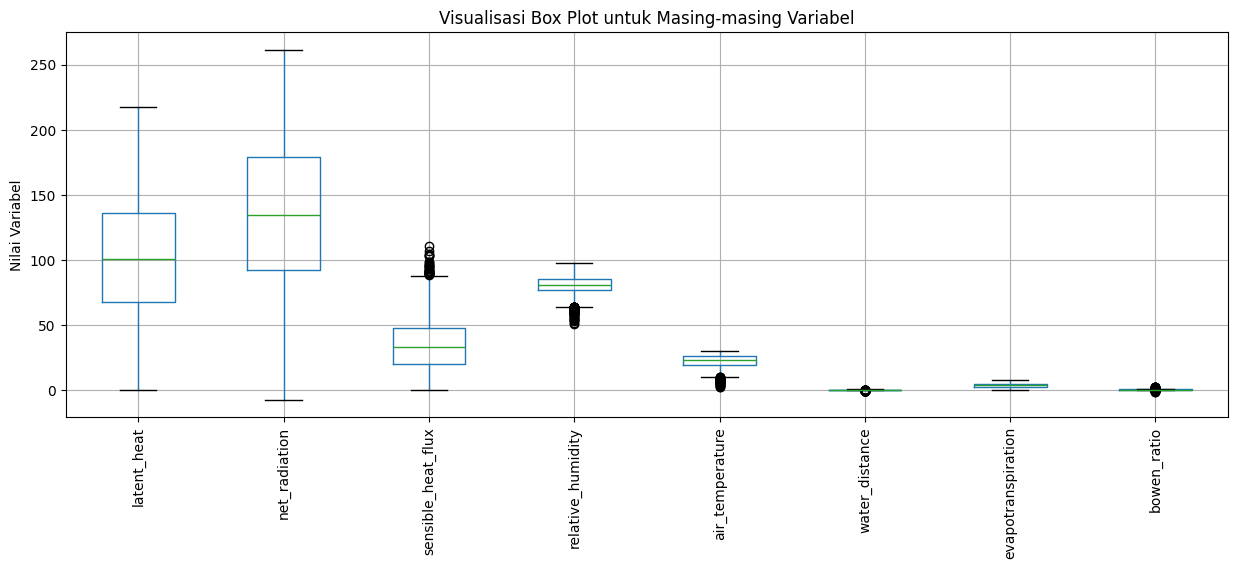

In [279]:
plt.figure(figsize=(15,5))
df_clean.boxplot(rot=90)
plt.title('Visualisasi Box Plot untuk Masing-masing Variabel')
y_label = df_clean.columns
plt.ylabel('Nilai Variabel')
plt.show()

Interpretasi:
Jika dilihat dengan box plot, terdapat beberapa variabel yang memiliki outlier seperti di
1. sensible_heat_flux
2. relative_humidity
3. air_temperature

Penulis memutuskan untuk tidak membuang ketiga outlier pada variabel tersebut karena masih masuk akal

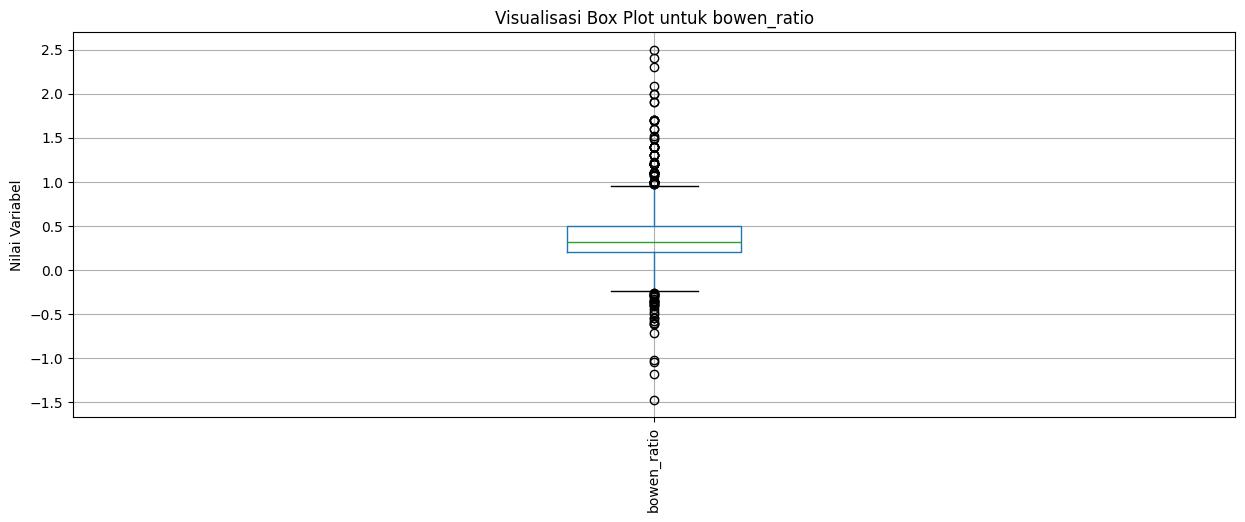

In [280]:
plt.figure(figsize=(15,5))
df_clean.boxplot('bowen_ratio',rot=90)
plt.title('Visualisasi Box Plot untuk bowen_ratio')
y_label = df_clean.columns
plt.ylabel('Nilai Variabel')
plt.show()

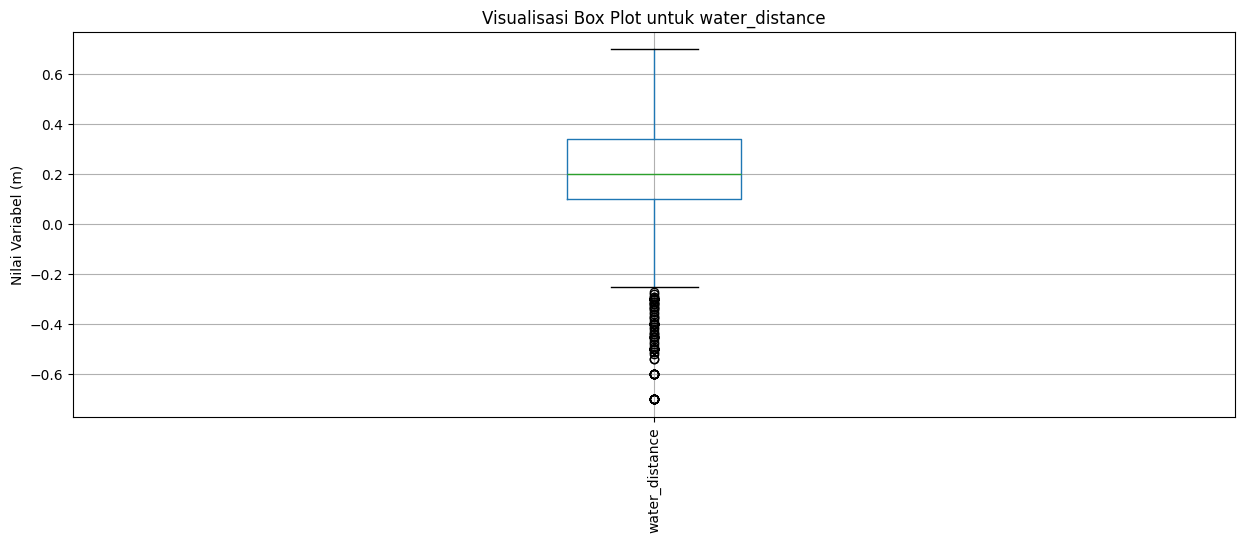

In [281]:
plt.figure(figsize=(15,5))
df_clean.boxplot('water_distance',rot=90)
plt.title('Visualisasi Box Plot untuk water_distance')
y_label = df_clean.columns
plt.ylabel('Nilai Variabel (m)')
plt.show()

Terdapat nilai outlier di bowen_ratio dan water_distance. Namun saya memutuskan untuk tidak membuang data outlier tersebut karena memang masing-masing nilai nya masih cukup masuk akal.

bowen_ratio bisa bernilai negatif yang menandakan adanya lebih banyak energi digunakan untuk penguapan daripada pemanasan udara. Hal ini umum terjadi di daerah dengan kelembaban tinggi, misalnya di atas danau atau hutan basah, khususnya pada studi kali ini di area "marsh" yang cenderung basah.

water_distance bisa bernilai negatif yang menandakan adanya perbedaan muka air dengan land surface.

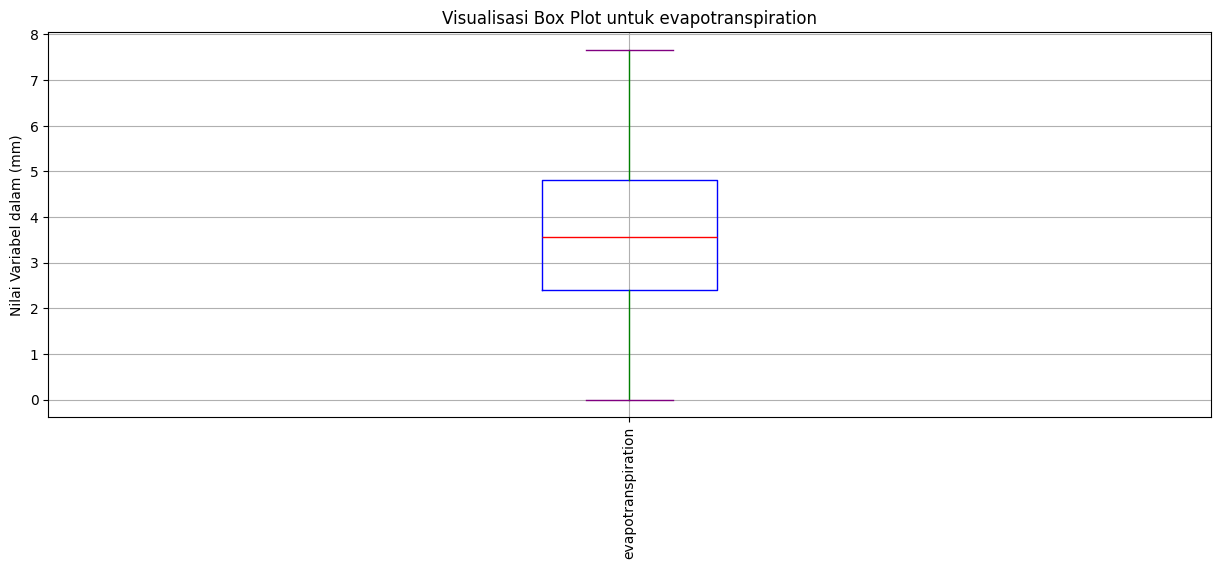

In [282]:
plt.figure(figsize=(15,5))
df_clean.boxplot('evapotranspiration',rot=90,
                        boxprops=dict(color="blue"),     # Warna box
                        medianprops=dict(color="red"),  # Warna garis median
                        whiskerprops=dict(color="green"), # Warna whisker
                        capprops=dict(color="purple"))
plt.title('Visualisasi Box Plot untuk evapotranspiration')
y_label = df_clean.columns
plt.ylabel('Nilai Variabel dalam (mm)')
plt.show()

Ini visualisasi pada data evapotranspiration yang akan dijadikan sebagai target utama prediksi. Nilainya berkisar antara 2.5 - 4.8 mm per hari.

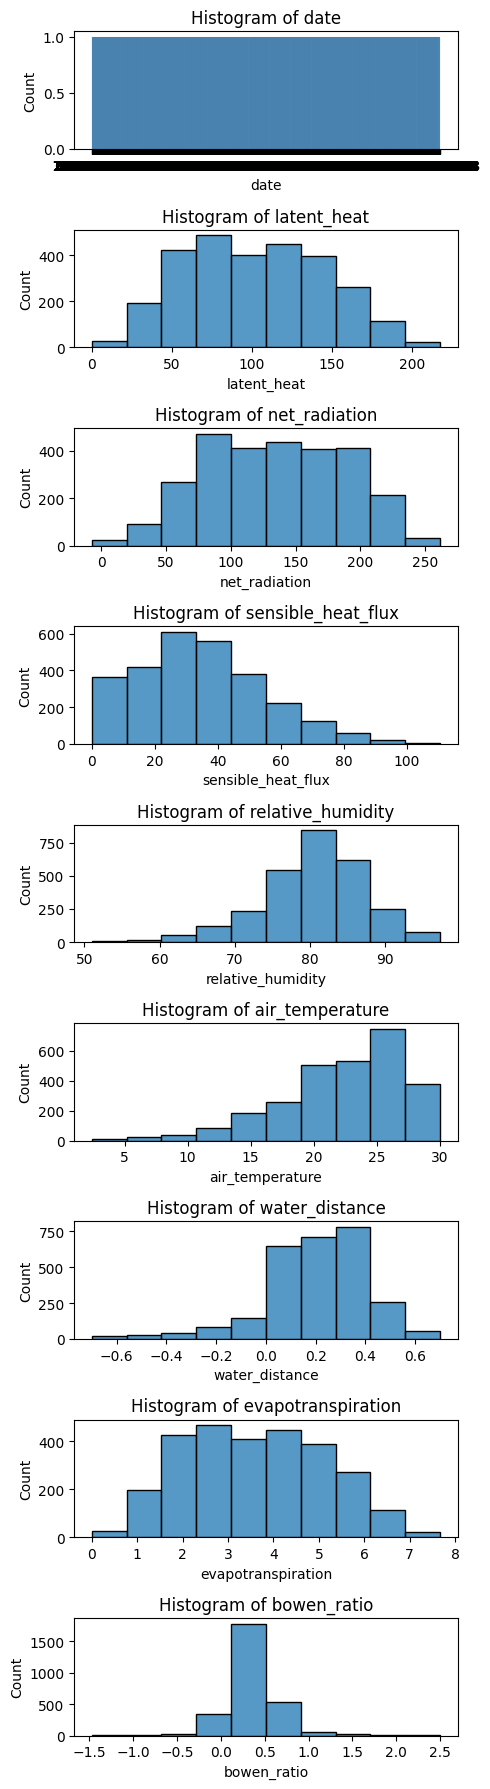

In [283]:
num_features = len(df_clean.columns)
fig, axes = plt.subplots(nrows=num_features, figsize=(5, 2 * num_features))
for i, column in enumerate(df_clean.columns):
    sns.histplot(df_clean[column], bins=10, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

Interpretasi <br>
Ternyata terdapat beberapa variabel yang skewed (tidak terdistribusi normal) seperti:
1. relative_humidity skewed poitif
2. air_temperatue skewed positif
3. water_distance skewed positif
4. sensible_heat_flux skewed negatif

In [284]:
features = df_clean.drop(columns=['evapotranspiration','date'],axis=1)
target = df_clean['evapotranspiration']

In [285]:
features

,latent_heat,net_radiation,sensible_heat_flux,relative_humidity,air_temperature,water_distance,bowen_ratio
0,61.53,64.0,0.00,77.2,20.40,0.10,-0.02
1,38.42,41.9,0.00,85.8,21.70,0.10,-0.17
2,67.70,93.3,27.39,84.4,24.20,0.10,0.40
3,61.01,87.4,28.78,87.9,22.50,0.10,0.47
4,50.24,63.0,13.19,91.4,21.60,0.10,0.26
...,...,...,...,...,...,...,...
3095,181.60,223.6,41.90,76.5,26.55,0.30,0.20
3096,127.10,178.8,51.70,77.5,27.50,0.29,0.40
3097,145.00,177.7,32.70,81.0,26.65,0.29,0.20
3098,184.70,223.1,38.40,77.0,26.85,0.28,0.20


In [286]:
target

,evapotranspiration
0,2.17
1,1.36
2,2.39
3,2.15
4,1.77
...,...
3095,6.40
3096,4.50
3097,5.10
3098,6.50


---



---


#### <i><b><span style='color:#55679C'>Stage 3. Splitting Train and Test Data </span>

In [287]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=0)
y_train

,evapotranspiration
391,1.19
2245,2.80
220,6.83
1860,2.60
17,2.78
...,...
764,1.58
836,4.57
1654,5.42
2937,1.50


In [288]:
y_test

,evapotranspiration
1102,1.48
1087,2.27
2039,4.90
332,2.80
1241,5.88
...,...
125,3.80
1094,1.99
2996,4.10
1687,5.64


Melakukan splitting antara target yang akan dijadikan train sebanyak 2077 (75% dari total data) dan test sebanyak 693 (25% dari total data).

---



---


#### <i><b><span style='color:#55679C'>Stage 4. Creating Model Linear Regression (Model 1) </span>

In [289]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [290]:
y_pred = model.predict(x_test)
y_pred

array([1.48033141, 2.26968839, 4.85372147, 2.80805452, 5.89244944,
       4.43626423, 4.73642051, 3.78123198, 1.74346684, 3.73552179,
       4.39519847, 2.8557538 , 6.26882678, 4.47411837, 6.42591949,
       2.77407825, 5.00180572, 2.76813394, 7.29547532, 5.7938373 ,
       2.07963646, 2.79332582, 1.39248795, 5.2808574 , 3.74085249,
       3.02310235, 4.93445996, 2.83374654, 5.09373679, 4.73352866,
       2.61126415, 1.90556339, 2.33248796, 2.44494411, 4.55171497,
       4.24375963, 5.16989491, 5.07566917, 4.47072624, 2.72638434,
       2.85252106, 5.64336717, 5.0015925 , 1.28627333, 6.85235366,
       4.5317057 , 2.90241894, 0.96236874, 1.47609045, 5.64261123,
       4.64491297, 4.35187179, 2.30030165, 1.37791765, 2.00722289,
       2.21748131, 6.11540557, 2.07558067, 2.30938126, 4.78280413,
       2.4052632 , 6.05449424, 3.12785835, 5.66487667, 2.13586314,
       4.30589211, 2.14309361, 2.4228518 , 4.10263957, 3.85295851,
       1.05843317, 2.10123476, 1.98789872, 4.37705851, 5.16832

---



---


#### <i><b><span style='color:#55679C'>Stage 5. Evaluating Model Using R Squared and Root Mean Squared Error</span>

In [291]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = round(r2_score(y_test, y_pred),4)
r2

0.9998

In [292]:
rmse = round(root_mean_squared_error(y_test, y_pred),4)
rmse

0.0195

---



---


#### <i><b><span style='color:#55679C'>Stage 6. Multicollinearity </span>

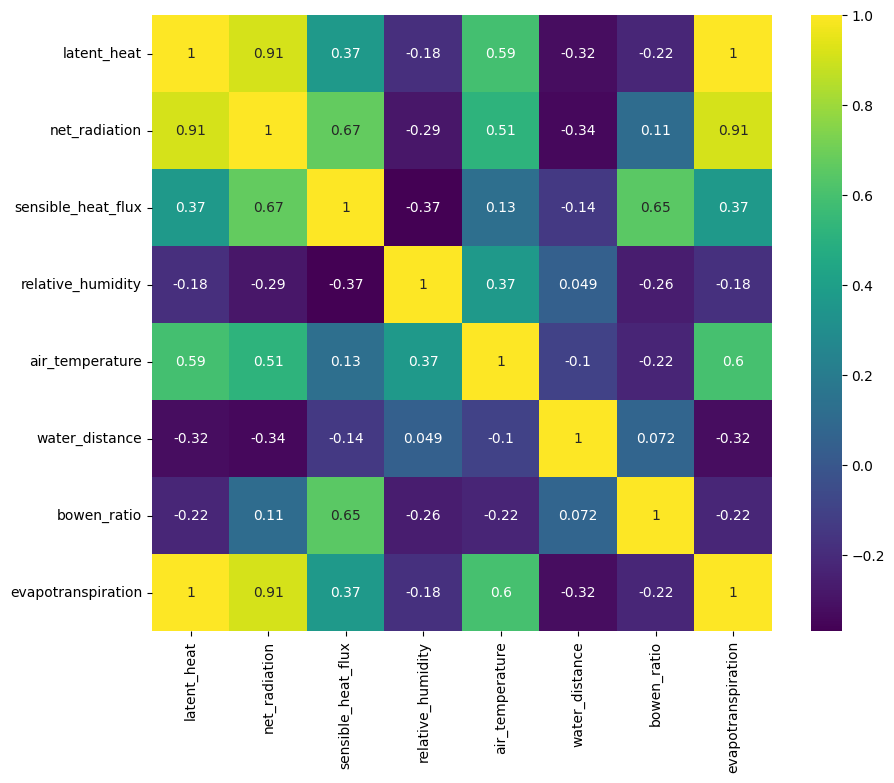

In [293]:
# Melakukan visualisasi heat map untuk melihat korelasi antar variable (Multicollinearity)
df_features_target = pd.concat([features,target],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(df_features_target.corr(),annot=True,cmap='viridis')
plt.show()

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Analisis nilai VIF
x_vif = add_constant(x_train)
vif_df_features_target = pd.DataFrame([vif(x_vif.values,i)
for i in range (x_vif.shape[1])], index = x_vif.columns).reset_index()
vif_df_features_target.columns = ['features','vif_score']
vif_df_features_target = vif_df_features_target.loc[vif_df_features_target.features!='const']
vif_df_features_target['vif_score']=vif_df_features_target['vif_score'].round(2)
vif_df_features_target

# Membuat fungsi untuk mengklasifikasikan vif_score
def classify_vif (vif_score):
  if vif_score <= 1:
    return "No Multicollinearity"
  elif vif_score >= 4 and vif_score < 10:
    return "Moderate Multicollinearity"
  elif vif_score >= 10:
    return "High Multicollinearity"
  else :
    return "Low Multicollinearity"

vif_df_features_target['vif_class']=vif_df_features_target['vif_score'].apply(classify_vif)
vif_df_features_target

,features,vif_score,vif_class
1,latent_heat,23.67,High Multicollinearity
2,net_radiation,31.69,High Multicollinearity
3,sensible_heat_flux,5.96,Moderate Multicollinearity
4,relative_humidity,1.84,Low Multicollinearity
5,air_temperature,2.55,Low Multicollinearity
6,water_distance,1.19,Low Multicollinearity
7,bowen_ratio,3.24,Low Multicollinearity


Interpretasi <br>
Beberapa poin yang dapat disampaikan:
1. Dari heat map terlihat  bahwa net_radiation dan latent_heat memiliki terkorelasi hingga mencapai 0.91.
2. Berdasarkan nilai VIF dari masing-masing features, didapatkan bahwa net_radiation dan latent heat memiliki nilai yang cukup tinggi dibandingkan dengan features lain (kategori High Multicollinearity).

Kesimpulan akhir: <br>
net_radiation dan latent_heat memiliki multikolinearitas tinggi, sehingga bisa dihapus karena bisa menyebabkan overfitting atau instabilitas model regresi. Opsi lainnya adalah mempertimbangkan sensible_heat_flux sebagai variabel opsional yang dapat dimasukan dalam model.

---



---


#### <i><b><span style='color:#55679C'>Stage 7. Clearing Latent Heat and Net Radiation (Model 2)</span>


In [248]:
features_no_LH_NR = features.drop(columns=['latent_heat','net_radiation'],axis=1)
features_no_LH_NR

,sensible_heat_flux,relative_humidity,air_temperature,water_distance,bowen_ratio
0,0.00,77.2,20.40,0.10,-0.02
1,0.00,85.8,21.70,0.10,-0.17
2,27.39,84.4,24.20,0.10,0.40
3,28.78,87.9,22.50,0.10,0.47
4,13.19,91.4,21.60,0.10,0.26
...,...,...,...,...,...
3095,41.90,76.5,26.55,0.30,0.20
3096,51.70,77.5,27.50,0.29,0.40
3097,32.70,81.0,26.65,0.29,0.20
3098,38.40,77.0,26.85,0.28,0.20


In [249]:
x_train,x_test,y_train,y_test = train_test_split(features_no_LH_NR,target,train_size=0.75,random_state=0)

In [250]:
model_no_LH_NR = LinearRegression()
model_no_LH_NR.fit(x_train,y_train)

LinearRegression()

In [251]:
y_pred_no_LH_NR = model_no_LH_NR.predict(x_test)
y_pred_no_LH_NR

array([ 1.74502252,  2.143527  ,  5.27483647,  2.76813927,  4.88432147,
        4.33074347,  4.74512669,  3.66621106,  1.95688104,  4.71367081,
        4.04937892,  3.59408891,  4.43356458,  4.57989076,  4.92788468,
        2.88884291,  5.11996413,  2.93019181,  5.21779999,  5.29306027,
        2.51292291,  4.0822064 ,  0.96855743,  4.84046129,  3.95314842,
        3.02245245,  3.91536097,  6.18746774,  5.55203958,  4.77716336,
        1.88711341,  1.43323801,  2.40970845,  2.74696622,  2.93688561,
        3.75395178,  4.3909929 ,  5.6823039 ,  4.83788083,  2.82549339,
        3.59273485,  4.0455529 ,  4.04571928,  0.90498241,  6.36707995,
        4.41783807,  2.9623366 ,  2.32629916,  1.11815604,  4.37456057,
        3.7871346 ,  4.53192938,  2.77249369,  1.05712085,  2.38030977,
        1.88521488,  4.90633192,  1.90438232,  2.50650887,  6.17947191,
        3.5563053 ,  5.79934858,  2.86300324,  5.74720433,  2.88577232,
        5.66579463,  1.86134453,  3.3991419 ,  5.03518069,  4.53

In [264]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score_no_LH_NR = round(r2_score(y_test,y_pred_no_LH_NR),4)
rmse_score_no_LH_NR = round(root_mean_squared_error(y_test,y_pred_no_LH_NR),4)


print('Model 1: DENGAN latent_heat dan net_radiation\n')
print('Model 2: TANPA latent_heat dan net_radiation')

Model 1: DENGAN latent_heat dan net_radiation

Model 2: TANPA latent_heat dan net_radiation


In [265]:
df_model_1 = pd.DataFrame({'Metric': ['R2 Score', 'RMSE'], 'Model 1': [r2, rmse]})
df_model_2 = pd.DataFrame({'Metric': ['R2 Score', 'RMSE'], 'Model 2': [r2_score_no_LH_NR, rmse_score_no_LH_NR]})

# Gabungkan berdasarkan metric
tabel = pd.merge(df_model_1, df_model_2, on='Metric')

# Menampilkan tabel
tabel

,Metric,Model 1,Model 2
0,R2 Score,0.9998,0.7033
1,RMSE,0.0195,0.8266


Dari hasil yang ditampilkan, model Model 1 memiliki R² = 0.9998 dan RMSE = 0.0195, sedangkan Model 2 memiliki R² = 0.7033 dan RMSE = 0.8266.

1. R² Score <br>
  - Model 1 (0.9998) → Sangat tinggi, yang bisa menjadi indikasi overfitting (terlalu baik di data training, tapi mungkin buruk di data testing). <br>
  - Model 2 (0.7033) → Lebih rendah, tetapi masih cukup baik untuk menjelaskan variabilitas data. Ini bisa menjadi tanda bahwa model lebih generalizable (tidak hanya cocok di data training).
2. RMSE (Root Mean Squared Error) <br>
  - Model 1 (0.0195) → Sangat kecil, bisa jadi karena model terlalu menyesuaikan diri dengan data (indikasi overfitting). <br>
  - Model 2 (0.8266) → Lebih besar dari Model 1, tetapi ini bisa menunjukkan model lebih realistis dalam prediksi. <br>

---



---


# <i><b><span style='color:#55679C'>Conclusion</span>

Dari hasil analisis **prediksi evapotranspirasi** di <span style='color:#1F618D'><b>Blue Cypress Marsh</b></span> menggunakan **regresi linear**, model awal menunjukkan **overfitting**.

---

Setelah dilakukan perbaikan dengan menghilangkan variabel yang menyebabkan multikolinearitas tinggi **(Net Radiation dan Latent Heat)**, model menjadi lebih generalisasi, terlihat dari penurunan skor R² menjadi 0.7033 dan peningkatan RMSE menjadi 0.8266 pada data uji.
<br><br>
Perubahan ini menunjukkan bahwa model yang diperbarui lebih realistis dalam menangkap hubungan antara variabel input dan evapotranspirasi, tanpa terlalu bergantung pada data pelatihan. Meskipun masih dapat ditingkatkan lebih lanjut, hasil ini mengindikasikan bahwa pemilihan fitur yang tepat sangat berpengaruh terhadap performa model dan mengurangi risiko overfitting. ✅

---



<a href="https://www.linkedin.com/in/iqbalfauzanh/"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>